## Introduction
In this project, I trained various machine learning models to predict whether a borrower will default on their loan. Loan default prediction is important in the finiancial sector as it helps banks and lenders to assess whuich loans are risk so they can reduce their losses.

Using a dataset of over 45,000 rows and 13 features, the models learn patterns that diffrentiates people who defaulted on their loan and those who did not. The objective of this project is to create a tool that can help lenders decide who to give loans to and who to be cautious about.

### Importing the various libraries to be employed

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, recall_score, f1_score, precision_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Data Dictionary


| Column                             | Description                                    | Type        |
|------------------------------------|------------------------------------------------|-------------|
| **person_age**                     | Age of the person                              | Float       |
| **person_gender**                  | Gender of the person                           | Categorical |
| **person_education**               | Highest education level                        | Categorical |
| **person_income**                  | Annual income                                  | Float       |
| **person_emp_exp**                 | Years of employment experience                 | Integer     |
| **person_home_ownership**          | Home ownership status (e.g., rent, own, mortgage)| Categorical |
| **loan_amnt**                      | Loan amount requested                          | Float       |
| **loan_intent**                    | Purpose of the loan                            | Categorical |
| **loan_int_rate**                  | Loan interest rate                             | Float       |
| **loan_percent_income**            | Loan amount as a percentage of annual income   | Float       |
| **cb_person_cred_hist_length**     | Length of credit history in years              | Float       |
| **credit_score**                   | Credit score of the person                     | Integer     |
| **previous_loan_defaults_on_file** | Indicator of previous loan defaults            | Categorical |
| **loan_status (target variable)**  | Loan approval status: 1 = approved; 0 = rejected| Integer     |

### Loading the dataset and creating a copy as well

In [3]:
loan_df = pd.read_csv('loan_data.csv')
loan = loan_df.copy()

### Printing the first 5 rows and last 5 rows

In [4]:
loan

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
print(f'Shape of Dataset: {loan.shape}')
print(f'Number of duplicate rows: {loan.duplicated().sum()}')

Shape of Dataset: (45000, 14)
Number of duplicate rows: 0


### Statistical Summary of the dataset

In [6]:
loan.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
print(f'Shape of dataset: {loan.shape}')

Shape of dataset: (45000, 14)


In [8]:
continuous_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'person_emp_exp']
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']
all_cols = categorical_cols + continuous_cols
# assert (continuous_cols+categorical_cols == loan_df.columns).all(), f'Columns are not equal'
assert not([x for x in list(all_cols) if x not in loan.columns])

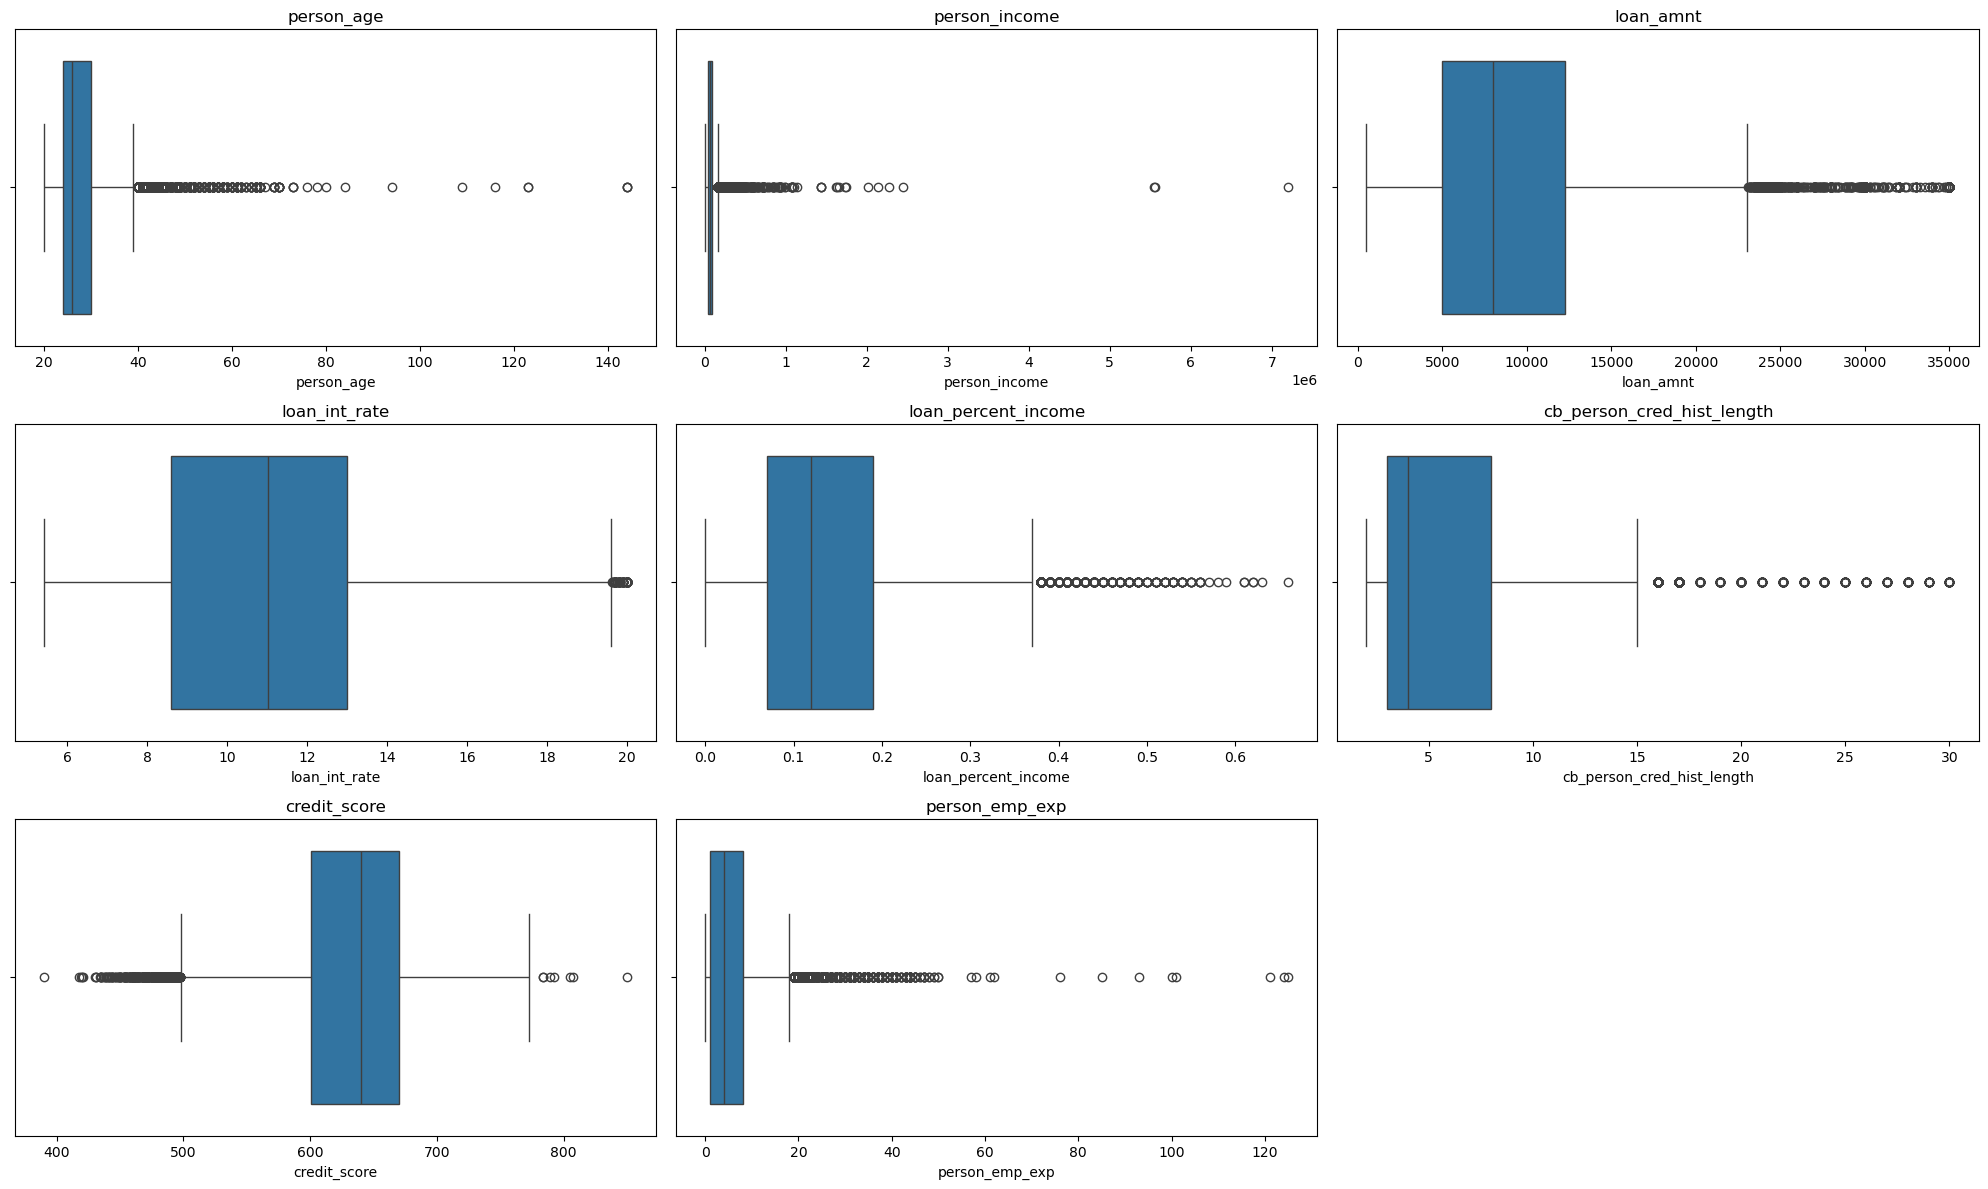

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=math.ceil(len(loan[continuous_cols].columns) / 3), figsize=(20, 12))
ax = ax.flatten()

for i, col in enumerate(loan[continuous_cols].columns):
    sns.boxplot(data=loan[continuous_cols], x=col, ax=ax[i])
    ax[i].set_title(col)

# Hide any unused axes
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


In [10]:
# def remove_outliers(df):
#   """
#     Function which takes in a dataframe as a parameter and then filters for outliers and returns a clean dataframe

#   """
#   df_normal = df.copy()
#   for col in df.columns:
#     q1 = np.quantile(df_normal[col], .25)
#     q3 = np.quantile(df_normal[col], .75)
#     iqr = q3-q1
#     upper = q3 + 1.5 *iqr
#     lower = q1 - 1.5 * iqr
#     df_normal= df_normal.loc[(df_normal[col] >= lower) & (df_normal[col]<=upper)]
#     # print(f'{col}\n Upper Limit=>{upper} Lower limit=> {lower}\n')
#   return df_normal
# clean_cat_df = remove_outliers(loan[continuous_cols])
# clean_cat_df.shape

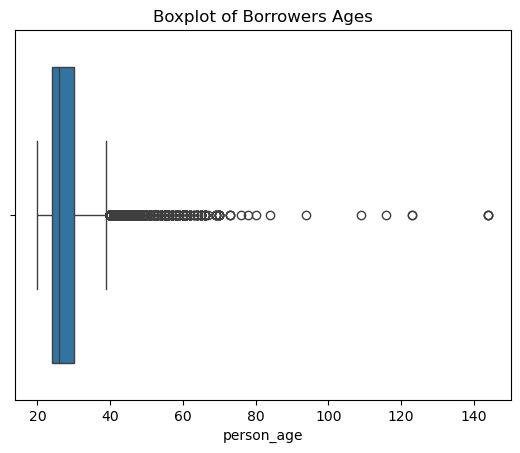

In [11]:
sns.boxplot(loan, x='person_age')
plt.title('Boxplot of Borrowers Ages');

### Dropping rows with outlier ages

In [12]:
loan = loan.loc[loan['person_age']< 80]

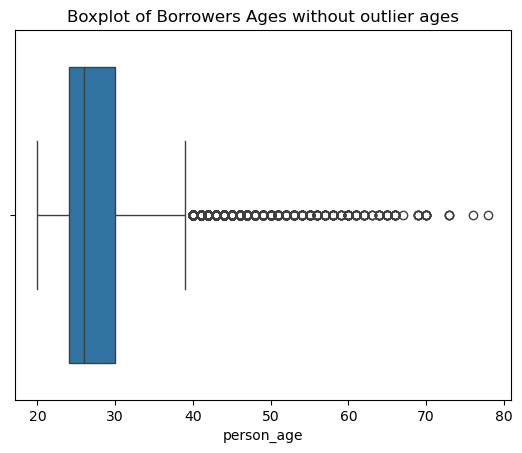

In [13]:
sns.boxplot(loan, x='person_age')
plt.title('Boxplot of Borrowers Ages without outlier ages');

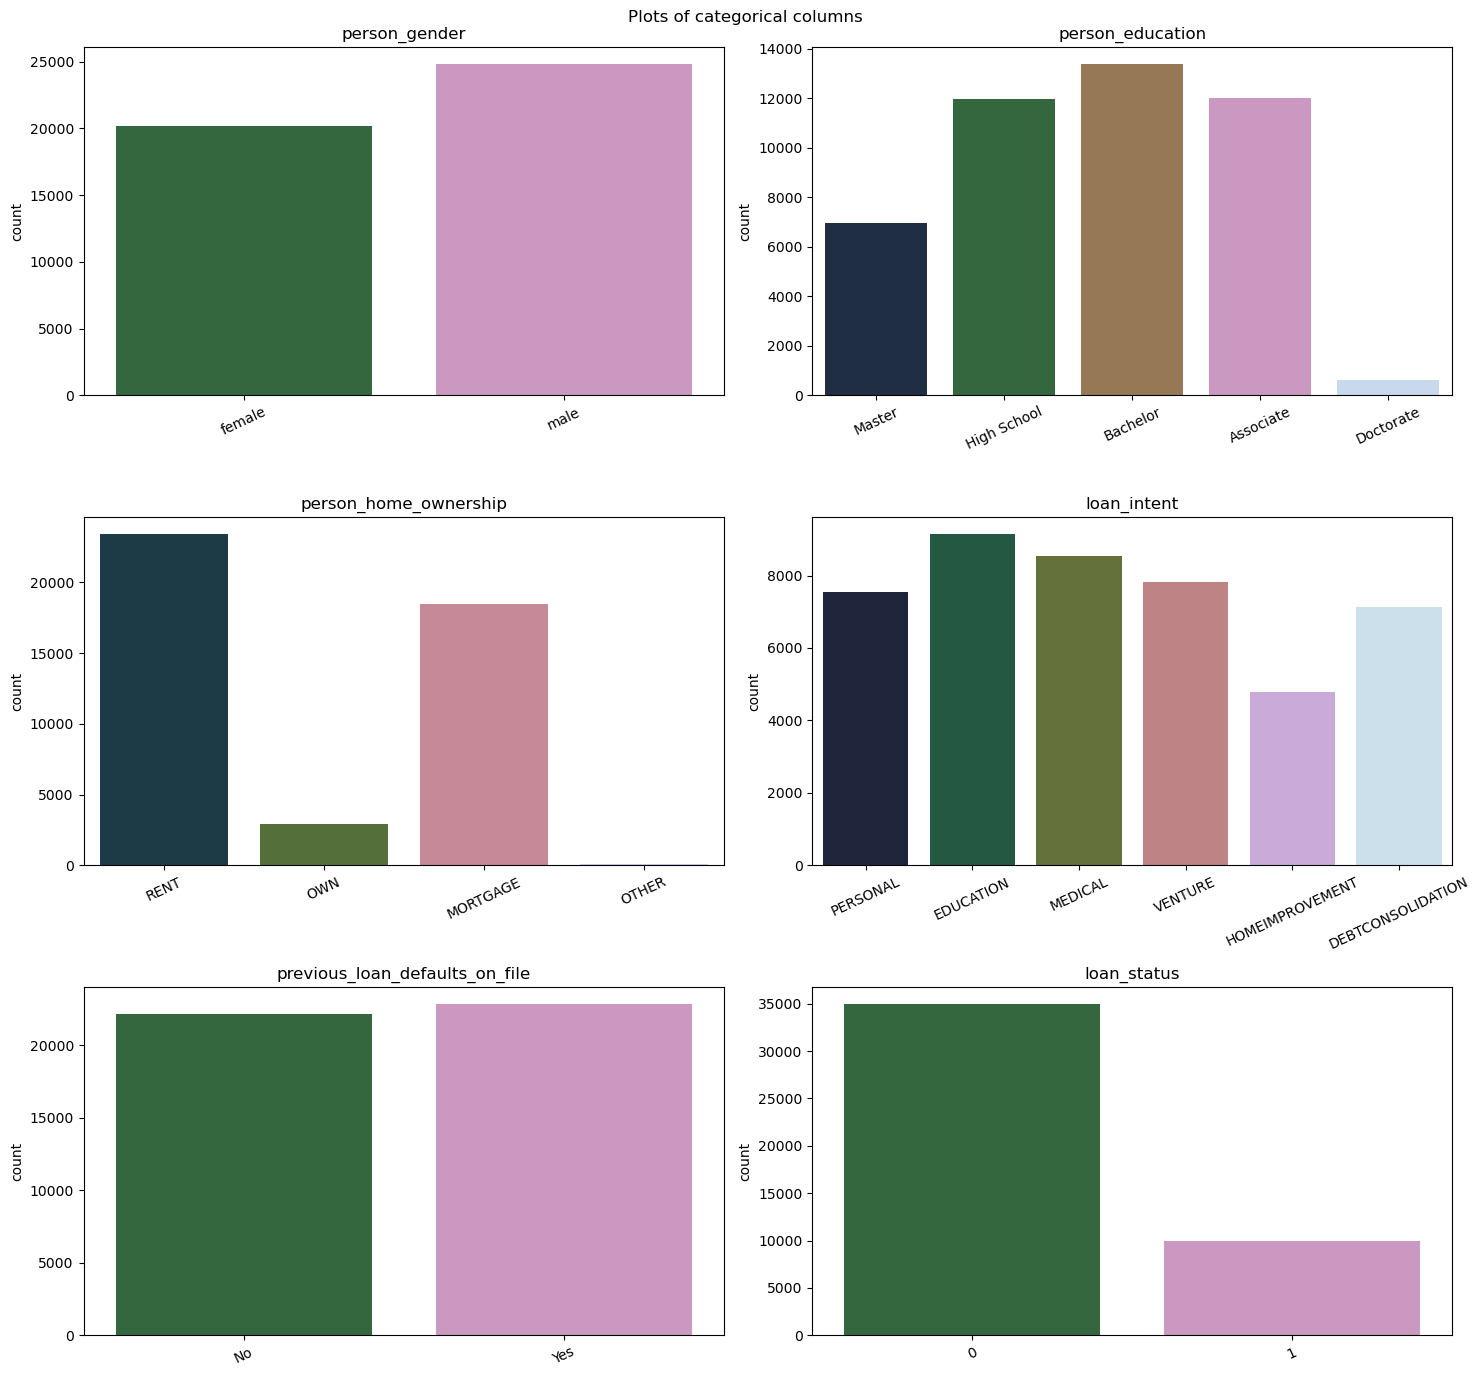

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=math.ceil(len(loan[categorical_cols].columns)/3), figsize=(15, 14))
ax = ax.flatten()
fig.suptitle('Plots of categorical columns')
# plt.tight_layout()
for i, col in enumerate(loan[categorical_cols].columns):
  sns.countplot(loan[categorical_cols], x=col, ax=ax[i], palette='cubehelix')
  plt.xticks(rotation=45)
  ax[i].set_title(col)
  ax[i].set_xlabel('')
  ax[i].tick_params(axis= 'x', rotation=25)
plt.tight_layout();

#remove empty plots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

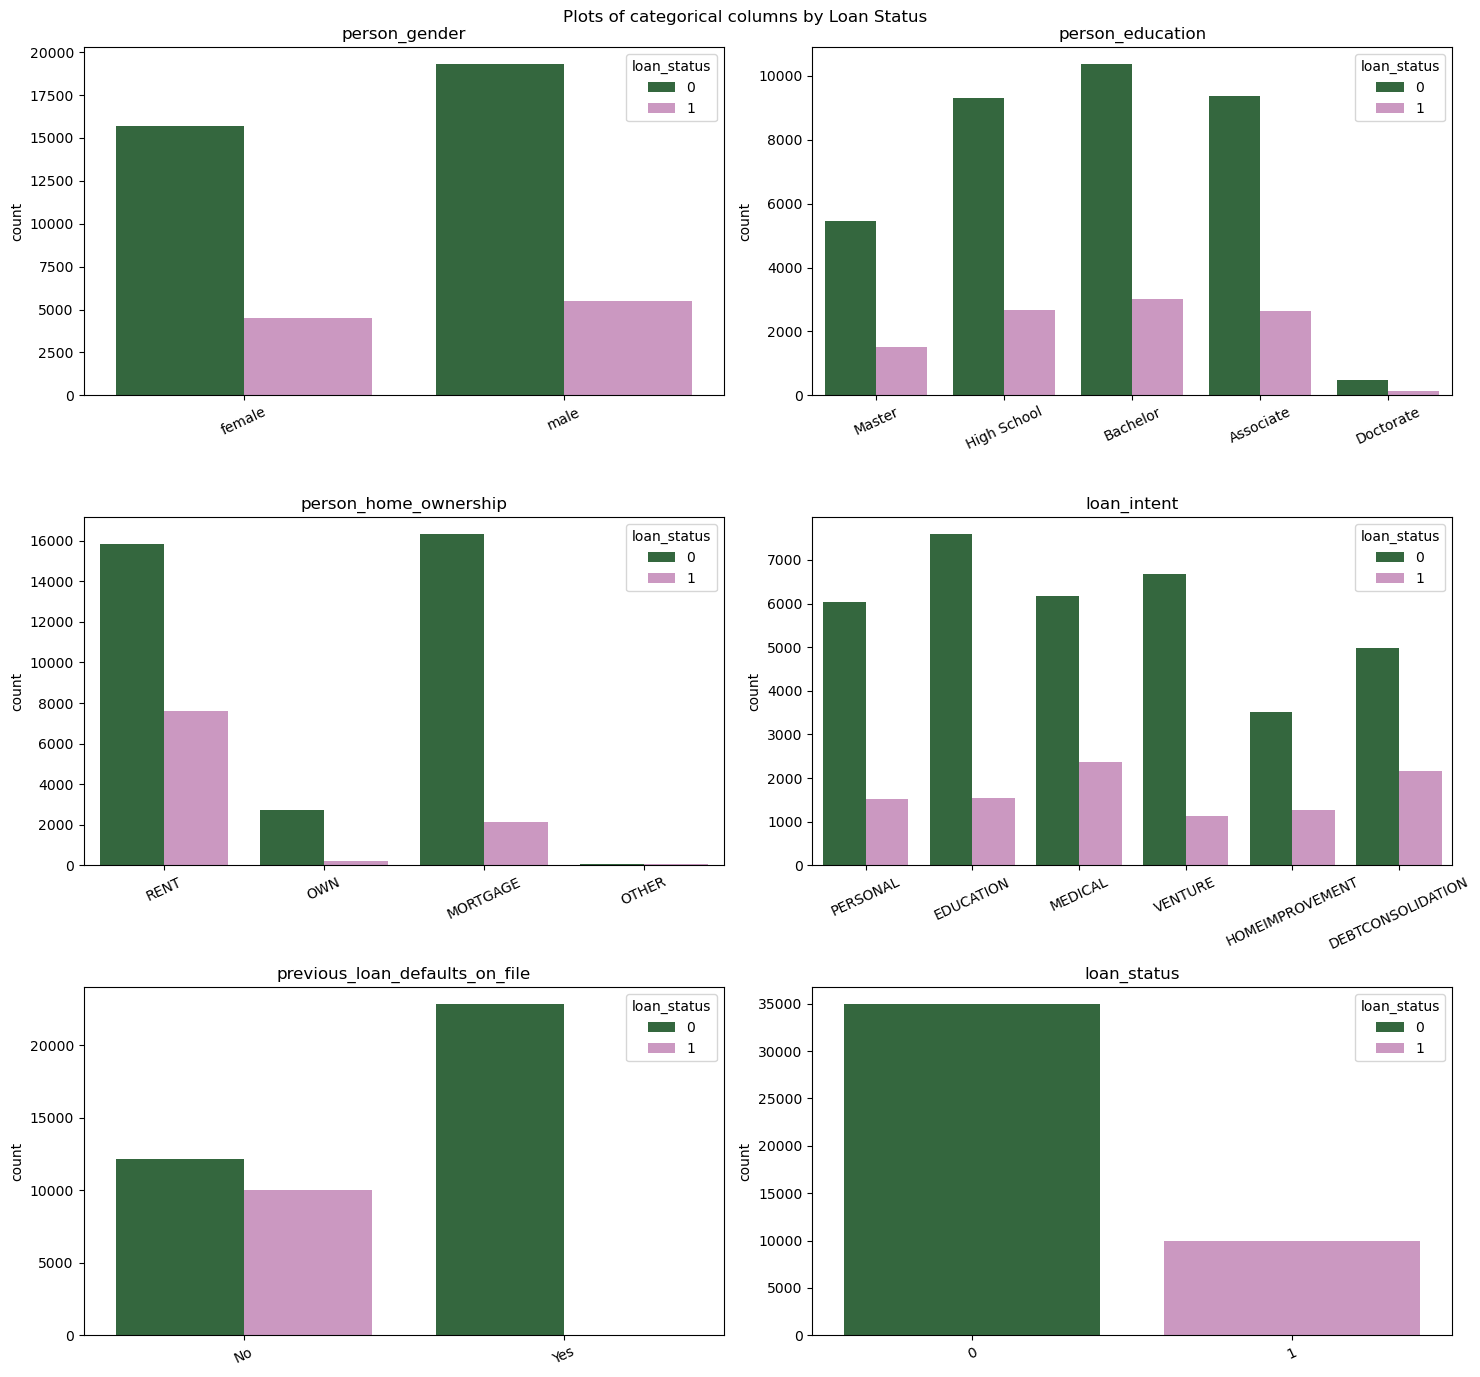

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=math.ceil(len(loan[categorical_cols].columns)/3), figsize=(15, 14))
ax = ax.flatten()
fig.suptitle('Plots of categorical columns by Loan Status')
# plt.tight_layout()
for i, col in enumerate(loan[categorical_cols].columns):
  sns.countplot(loan[categorical_cols], x=col, ax=ax[i], hue='loan_status', palette='cubehelix')
  plt.xticks(rotation=45)
  ax[i].set_title(col)
  ax[i].set_xlabel('')
  ax[i].tick_params(axis= 'x', rotation=25)
plt.tight_layout();

#remove unused plots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

loan_status
0    0.777728
1    0.222272
Name: proportion, dtype: float64


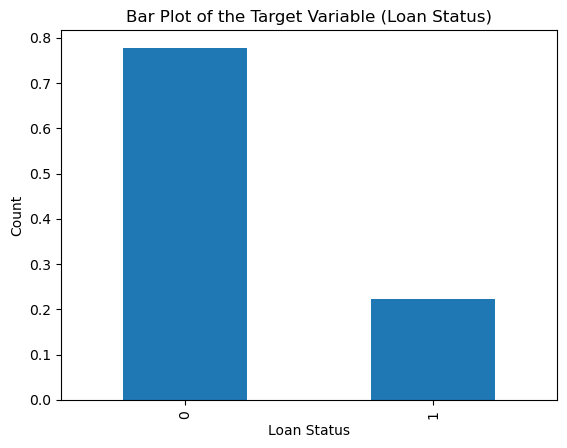

In [16]:
### Plot of loan status
## The vast majority of customers in our dataset didn't default on their loans. we have about 3.5x more non-defaulters which gives us a class imbalance
print(f"{loan['loan_status'].value_counts(normalize=True)}")
loan['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.title('Bar Plot of the Target Variable (Loan Status)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [16]:
# fig, ax = plt.subplots(nrows=3, ncols=math.ceil(len(loan.columns) / 3), figsize=(20, 12))
# ax = ax.flatten()

# for i, col in enumerate(loan.columns):
#     sns.boxplot(data=loan, x=col, ax=ax[i])
#     ax[i].set_title(col)

# for j in range(i + 1, len(ax)):
#     fig.delaxes(ax[j])

# plt.tight_layout()
# plt.show()


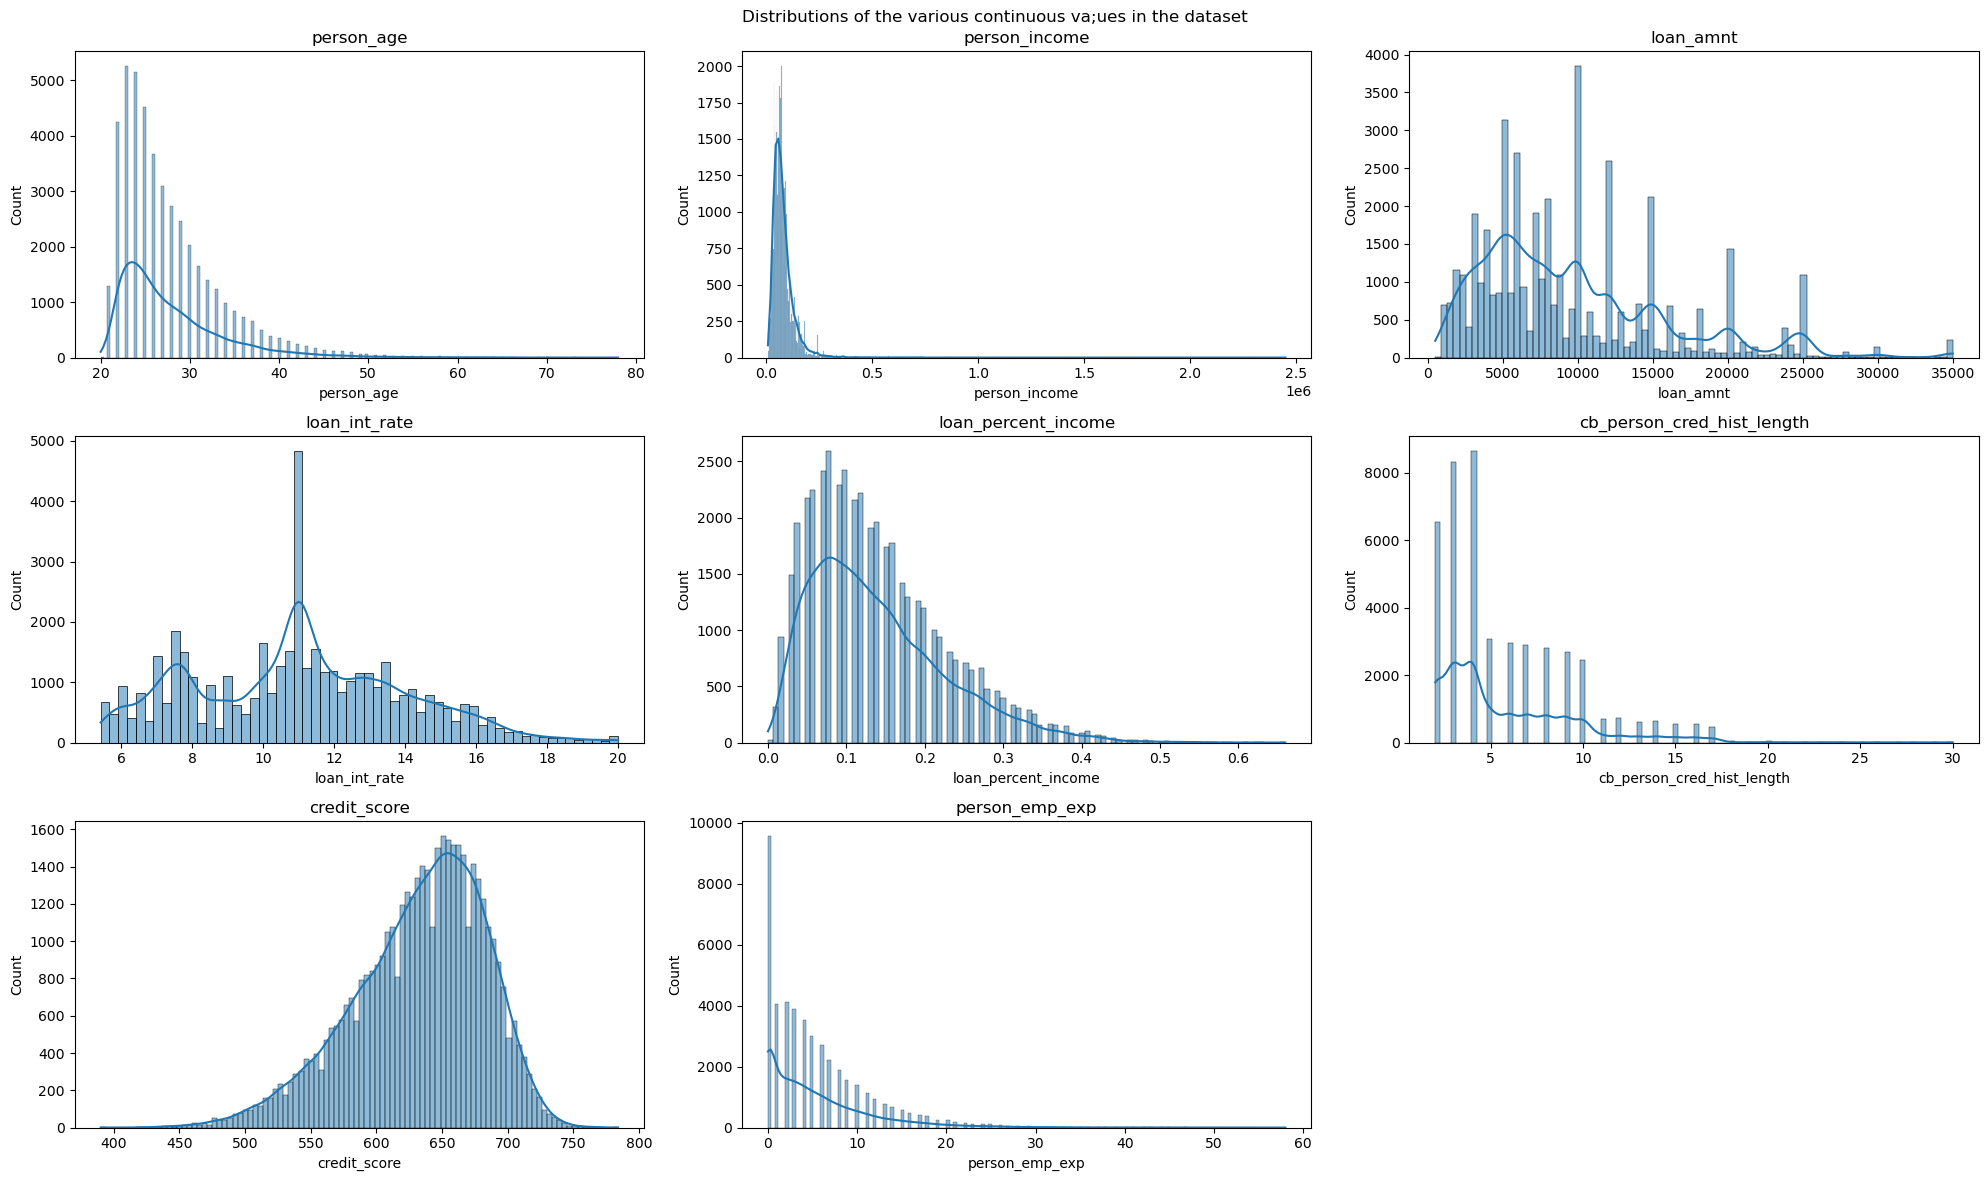

In [19]:
##Distribution of the various continuous variables
fig, ax = plt.subplots(nrows=3, ncols=math.ceil(len(loan[continuous_cols].columns) / 3), figsize=(20, 12))
ax = ax.flatten()
fig.suptitle('Distributions of the various continuous va;ues in the dataset')
for i, col in enumerate(loan[continuous_cols].columns):
    sns.histplot(data=loan[continuous_cols], x=col, ax=ax[i], kde=True)
    ax[i].set_title(col)

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


In [23]:
loan.pivot_table(index='loan_status', values='credit_score', aggfunc='mean', columns='person_education')

person_education,Associate,Bachelor,Doctorate,High School,Master
loan_status,,,,,
0,629.097590,638.603681,669.945720,619.048193,648.123604
1,630.226038,637.813121,661.176056,617.716211,645.191573


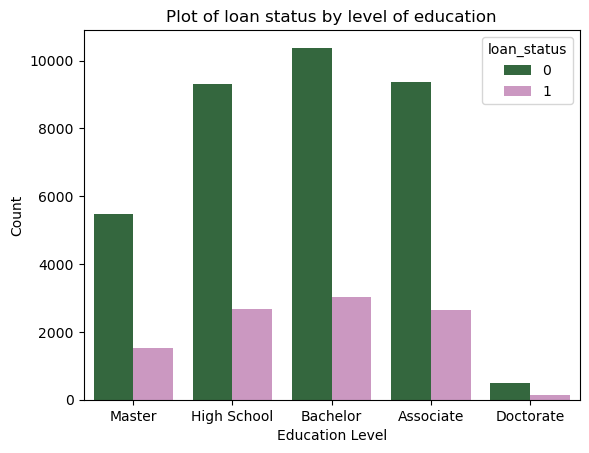

In [20]:
sns.countplot(loan, x='person_education', hue='loan_status', palette='cubehelix')
plt.title('Plot of loan status by level of education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

#### The vast majority of loan defaulters are found at low income levels

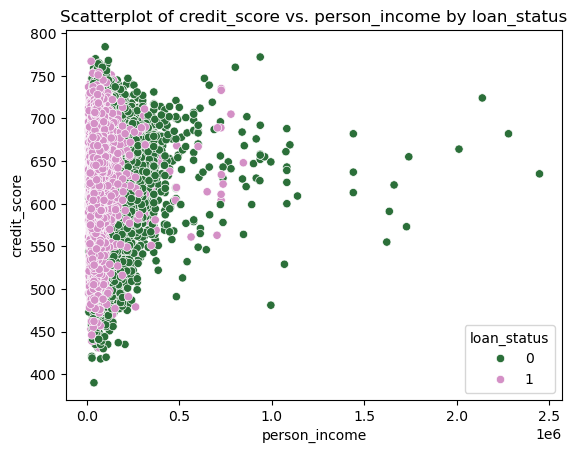

In [16]:
sns.scatterplot(loan, x='person_income', y='credit_score', hue='loan_status', palette='cubehelix')
plt.title('Scatterplot of credit_score vs. person_income by loan_status');

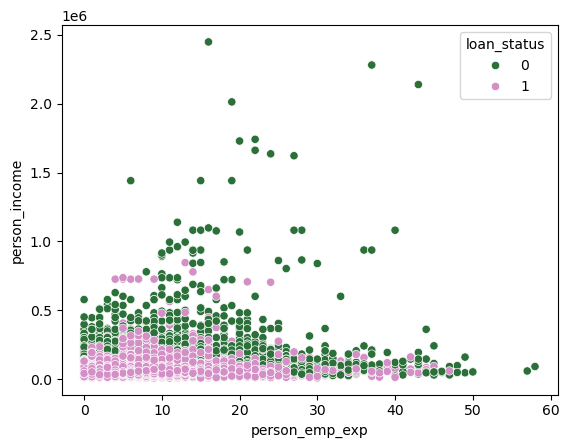

In [17]:
sns.scatterplot(loan, y='person_income', x= 'person_emp_exp', hue='loan_status', palette='cubehelix');
# plt.titl

#### Filtering the person_income column for incomes less than the 95th percentile for better visualiation

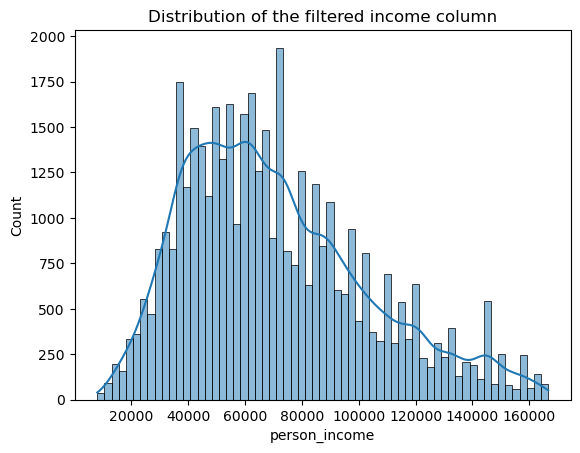

In [27]:
# filtering our income columns for incomes less than the 95th percentile for better visualiation
filtered_income = loan.loc[loan['person_income'] <loan['person_income'].quantile(.95)]
sns.histplot(filtered_income['person_income'], kde=True)
plt.title('Distribution of the filtered income column');

### The vast majority of defaulters have lower years of employment experience and low income

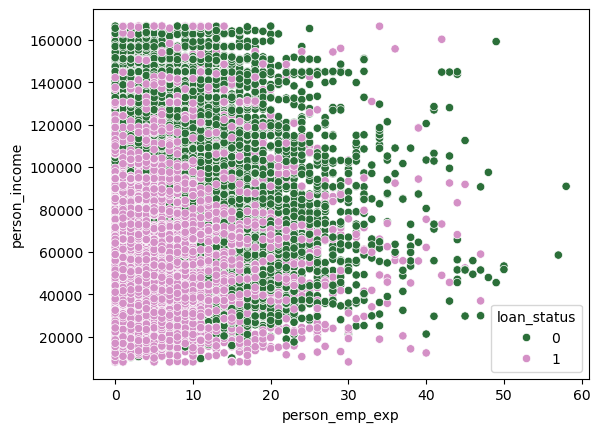

In [19]:
sns.scatterplot(filtered_income, y='person_income', x= 'person_emp_exp', hue='loan_status', palette='cubehelix')
plt.title('Scatterplot of Income vs. years of employment experience');

In [20]:
# income_q1 = loan['person_income'] < loan['person_income'].quantile(.9)
# income_q9 = loan['person_income']> loan['person_income'].quantile(.1)
# filtered_income= loan.loc[income_q1 & income_q9]
# filtered_income['person_income'].hist(bins=10)
# plt.title('Income Distribution')
# plt.xlabel('Income')
# plt.ylabel('Frequency')

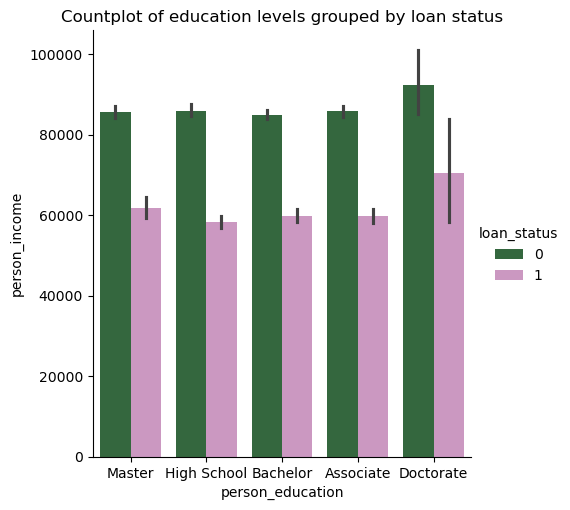

In [21]:
sns.catplot(loan, x='person_education', y='person_income', hue='loan_status', kind='bar', palette='cubehelix')
plt.title('Countplot of education levels grouped by loan status');

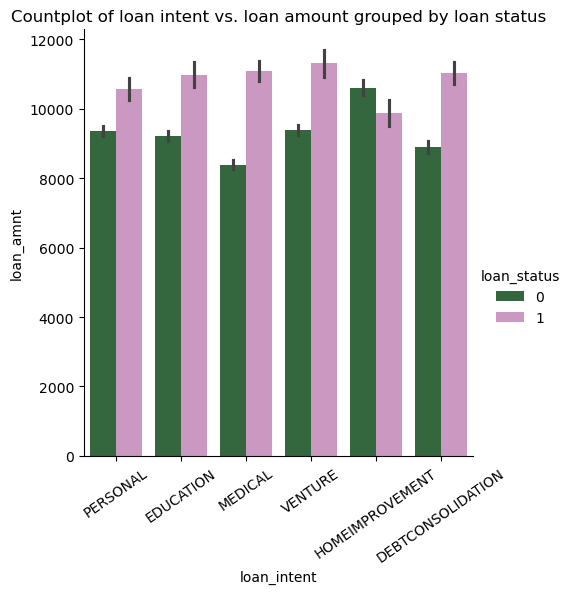

In [22]:
sns.catplot(loan, x='loan_intent', y='loan_amnt', hue='loan_status', kind='bar', palette='cubehelix')
plt.xticks(rotation=35)
plt.title('Countplot of loan intent vs. loan amount grouped by loan status');

In [23]:
# sns.scatterplot(loan, x='loan_amnt', y='person_emp_exp', hue='loan_status', alpha=.7);

### Borrowers with lower income tend to default more on their loan

In [24]:
sns.scatterplot(filtered_income, x='person_income', y='credit_score', hue='loan_status', alpha=.7, palette='cubehelix')
plt.title('Scatterplot of credit score vs. income grouped by loan status');

NameError: name 'filtered_income' is not defined

In [25]:
sns.scatterplot(filtered_income, x='loan_percent_income', y='credit_score', hue='loan_status', alpha=.7, palette='cubehelix');

NameError: name 'filtered_income' is not defined

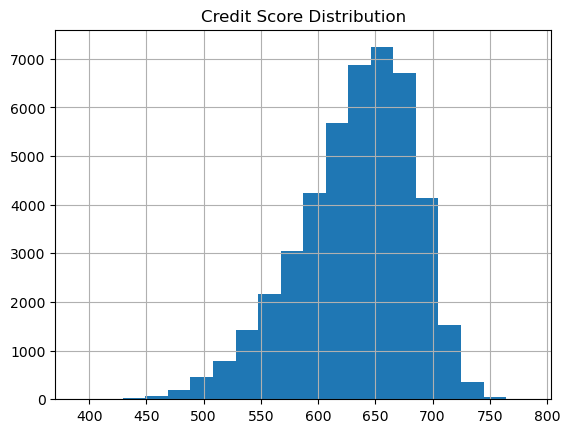

In [26]:
## Majority of credit scores are around 650
loan['credit_score'].hist(bins=20)
plt.title('Credit Score Distribution');

<Axes: >

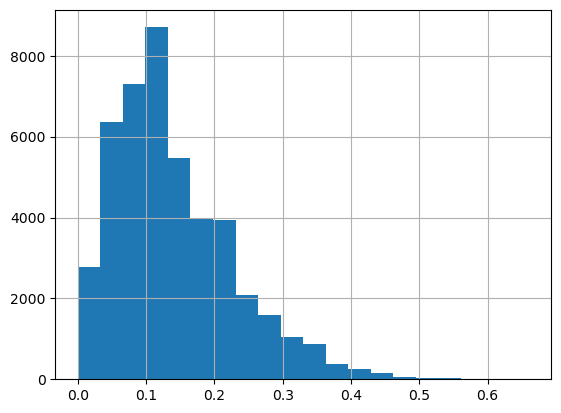

In [27]:
loan['loan_percent_income'].hist(bins=20)

In [28]:
# sns.countplot(loan, x='previous_loan_defaults_on_file', hue='loan_status');
# loan.groupby(['loan_status', 'previous_loan_defaults_on_file']).size()
### According to the dataset, we do not have borrowers who have initially defaulted on their loans and also default on their current loan
pd.crosstab(loan['previous_loan_defaults_on_file'], loan['loan_status'])

loan_status,0,1
previous_loan_defaults_on_file,,
No,12135,10000
Yes,22855,0


In [29]:
# loan.loc[(loan['loan_status']==1) & (loan['previous_loan_defaults_on_file']=='Yes')]
# (loan.loc[loan['previous_loan_defaults_on_file']=='No']).shape
loan.loc[loan['loan_status']==1].shape

(10000, 14)

In [30]:
loan[loan['previous_loan_defaults_on_file']=='Yes']['loan_status'].value_counts()

loan_status
0    22855
Name: count, dtype: int64

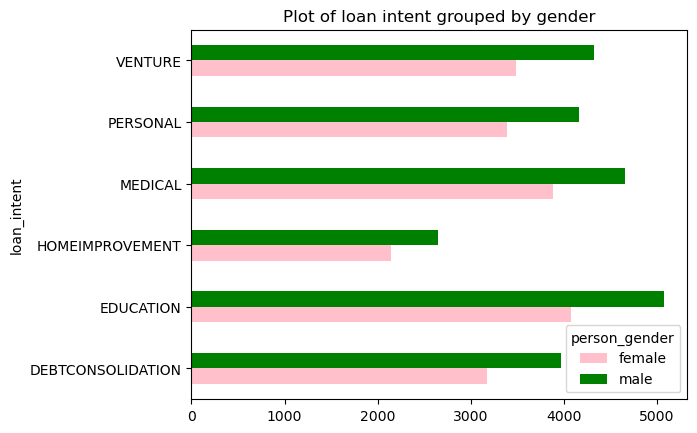

In [31]:
pd.crosstab(loan['loan_intent'], loan['person_gender']).plot(kind='barh', color=['pink', 'green'])
plt.title('Plot of loan intent grouped by gender');
# plt.xticks(rotation=20);

#### From the above plot, we see that both men and women mostly borrow to fund their education

In [32]:
def default_ratio_plot(col):
  """
  Function that takes in a categorical column of the loan dataframe as a parameter and then plots a barchart of the default ratio of the columns
  .........
  Params: col
  """
  if col in categorical_cols and col is not 'loan_status':
    col_df = pd.crosstab(loan[col], loan['loan_status'])
    col_df['default_ratio'] = col_df[1]/ (col_df[1]+ col_df[0])
    col_df = col_df.sort_values('default_ratio', ascending=False)
    # print(col_df.sort_values(by='default_ratio'))
    print('\n')
    print(f"Borrowers who are {col_df.index[0]} are {(col_df['default_ratio'][0] / col_df['default_ratio'][-1])} times more likely to default on their loans than borrowers who are {col_df.index[-1]}")
    print(f'... ' * 20)
    col_df.sort_values(by='default_ratio')['default_ratio'].plot(kind='barh')
    plt.title(f'Bar plot of Loan Default ratio based on {col}')
    plt.show();
  elif col not in all_cols:
    print(f'Pls ensure you enter a valid column!')
  else:
      pass
    # print(f'Pls ensure the column entered is a categorical column');




Borrowers who are female are 1.0018904186002078 times more likely to default on their loans than borrowers who are male
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... 


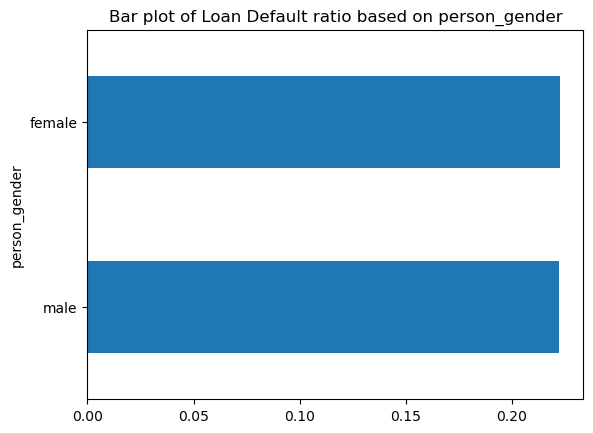



Borrowers who are Doctorate are 1.0507378890468453 times more likely to default on their loans than borrowers who are Master
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... 


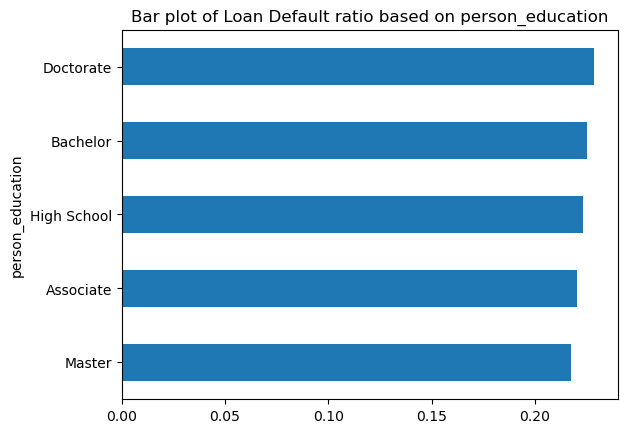



Borrowers who are OTHER are 4.430930930930931 times more likely to default on their loans than borrowers who are OWN
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... 


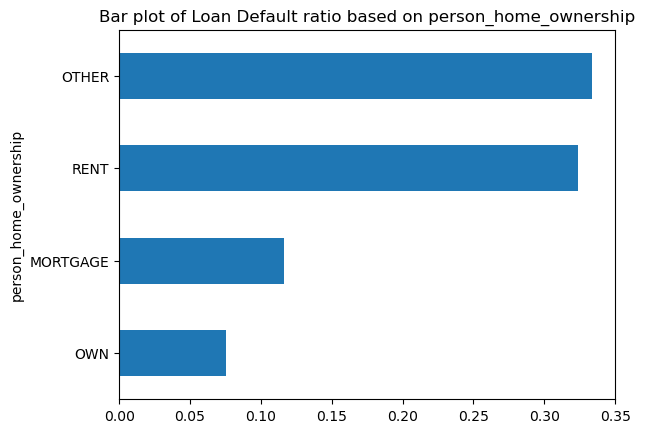



Borrowers who are DEBTCONSOLIDATION are 2.0973657370873844 times more likely to default on their loans than borrowers who are VENTURE
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... 


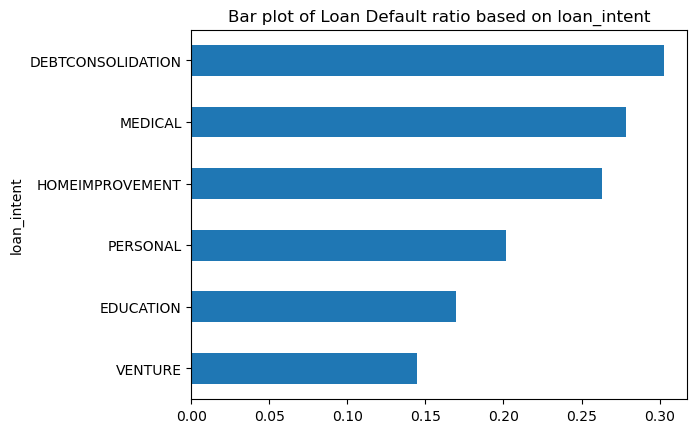



Borrowers who are No are inf times more likely to default on their loans than borrowers who are Yes
... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... 


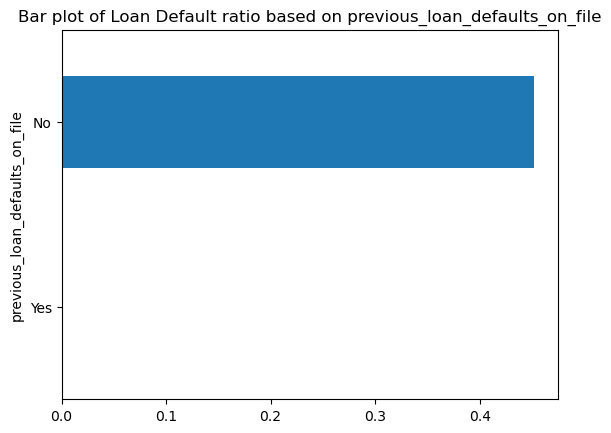

In [33]:
# default_ratio_plot('person_income')
for col in categorical_cols:
  default_ratio_plot(col)

**Borrowers who live in rented houses are 4.4x more likely to default on their loans than those who own their houses.**

In [34]:
loan_intent_loan_status_df

NameError: name 'loan_intent_loan_status_df' is not defined

In [ ]:
loan_intent_loan_status_df['default_ratio'][0] / loan_intent_loan_status_df['default_ratio'][-1]

np.float64(2.0973657370873844)

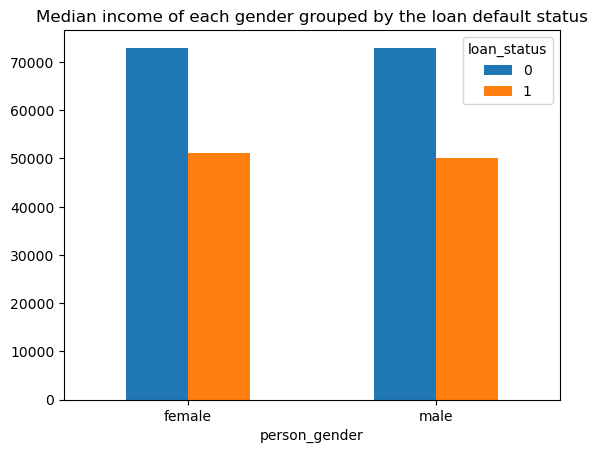

In [35]:
loan.pivot_table(index='person_gender', values='person_income', columns='loan_status', aggfunc='median').plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Median income of each gender grouped by the loan default status');

In [36]:
# sns.scatterplot(loan, hue='person_gender', x='person_income', y='person_emp_exp', alpha=.7);
sns.histplot(filtered_income,x='person_income', hue='person_gender', kde=True, alpha=.3, palette='cubehelix')
plt.title('Distribution of income levels by gender');

NameError: name 'filtered_income' is not defined

In [37]:
# bins =[20, 23, 27, 30, 40, 50, 60, 70, 80, 90, 150]
# labels = ['early 20s', 'mid 20s', 'late 20s', '30s', '40s', '50s', '60s', '70s', '80s', 'others']
# loan['age_categories'] = pd.cut(loan['person_age'], bins=bins, labels=labels)
# loan[['person_age', 'age_categories']].tail()

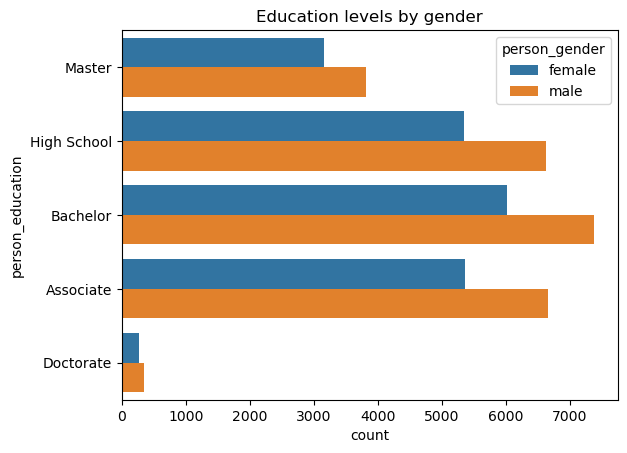

In [38]:
sns.countplot(loan, y='person_education', hue='person_gender')
plt.title('Education levels by gender');

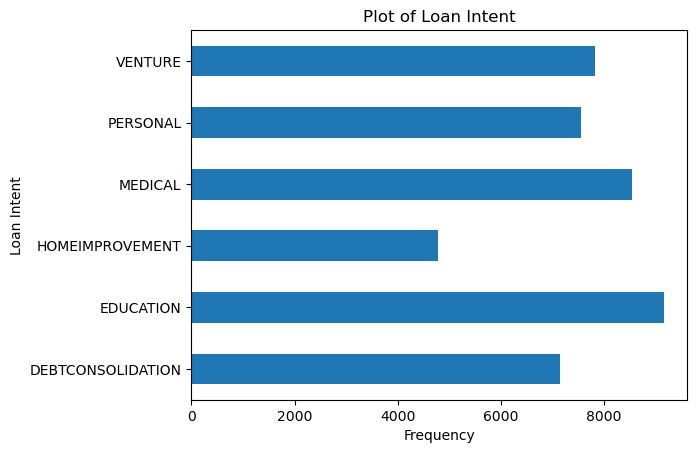

In [39]:
loan.groupby('loan_intent').size().plot(kind='barh')
plt.gca().spines[['left', 'bottom']].set_visible(True)
plt.title('Plot of Loan Intent')
plt.xlabel('Frequency')
plt.ylabel('Loan Intent');

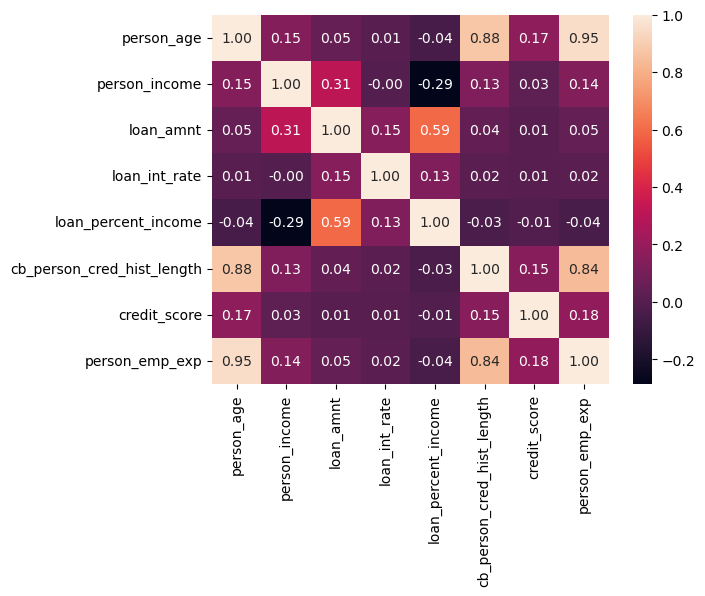

In [40]:
# sns.heatmap(loan.corr(), annot=True)
# loan.s.corr().style.background_gradient(cmap='coolwar,m')
# sns.set_palette('coolwarm')
sns.heatmap(loan[continuous_cols].corr(), annot=True, fmt='.2f');

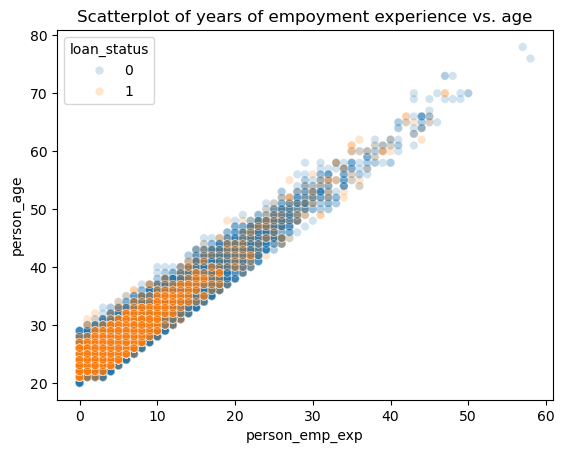

In [41]:
sns.scatterplot(loan, x='person_emp_exp', y='person_age', hue='loan_status', alpha=.2)
plt.title('Scatterplot of years of empoyment experience vs. age');

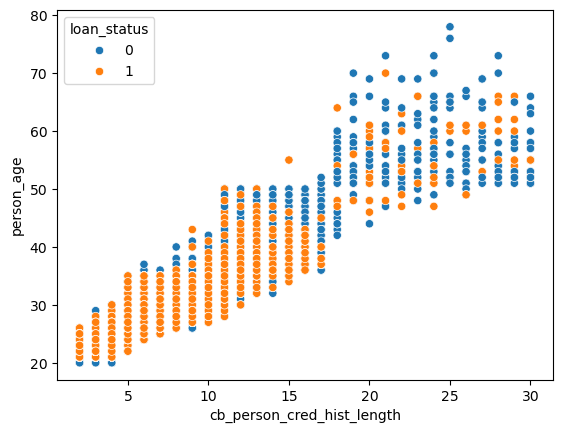

In [42]:
sns.scatterplot(loan, x='cb_person_cred_hist_length', y='person_age', hue='loan_status');
# sns.set_palette('deep')

In [43]:
gender_dict = {'female': 0, 'male': 1}
education_dict = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
loan_default_dict = {'No': 0, 'Yes': 1}
loan['person_gender'] = loan['person_gender'].map(gender_dict)
loan['person_education'] = loan['person_education'].map(education_dict)
loan['previous_loan_defaults_on_file'] = loan['previous_loan_defaults_on_file'].map(loan_default_dict)
loan_dummies = pd.get_dummies(loan, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

In [44]:
loan_dummies

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,False,False,True,False,False,False,True,False
1,21.0,0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,False,True,False,True,False,False,False,False
2,25.0,0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,False,False,False,False,False,True,False,False
3,23.0,0,2,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,False,False,True,False,False,True,False,False
4,24.0,1,3,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,47971.0,6,15000.0,15.66,0.31,3.0,645,0,1,False,False,True,False,False,True,False,False
44996,37.0,0,1,65800.0,17,9000.0,14.07,0.14,11.0,621,0,1,False,False,True,False,True,False,False,False
44997,33.0,1,1,56942.0,7,2771.0,10.02,0.05,10.0,668,0,1,False,False,True,False,False,False,False,False
44998,29.0,1,2,33164.0,4,12000.0,13.23,0.36,6.0,604,0,1,False,False,True,True,False,False,False,False


In [45]:
X = loan_dummies.drop(['loan_status'], axis=1)
y = loan_dummies['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [46]:
baseline_accuracy = loan_dummies['loan_status'].value_counts(normalize=True).max()
print(f'Baseline Accuracy: {baseline_accuracy:.2f}')

Baseline Accuracy: 0.78


In [47]:
logreg = LogisticRegression(max_iter=2000,  class_weight='balanced', )
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [48]:
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc_score}')

Accuracy Score: 0.8389642142698377


In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred= logreg.predict(X_test_scaled)
print(f'Accuracy of Scaled data: {accuracy_score(y_test, y_pred)}')

Accuracy of Scaled data: 0.8968659702156034


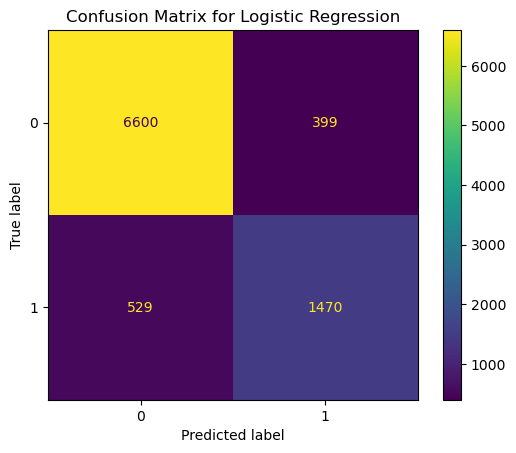

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)
plt.title('Confusion Matrix for Logistic Regression');

In [51]:
recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.735367683841921, 0.7865168539325843)

**recall** is the fraction of actual defaults that we caught. *(ie. people we said that defaulted that acually defaulted*))<br>
**precision** is the fraction of the people that defaulted out of all those our model flagged as default. *()*

<b>False Negative (FN):</b> We say a person didn't default on their loan but they they actually did.<br>
<b>False Positive (FP):</b> We say a person defaulted on their loan but they actually did not.<br>
For the point of view of a Lender, a FN is worse because they can live with wongly predicting a person will default and not give them the loan (FP). Whereas, giving a customer-- who our model wrongly predicted they will not default, a loan is bad because it exposes us to a higher level of risk.<br> So in this context, we optimize for a high <b>recall score</b> which has the formula: recall score = TP/ (TP +FN). higher recall = lower FN<br>

<header>so, for the first model, we wrongly predicted 517 defaulters as non-defaulters</header>

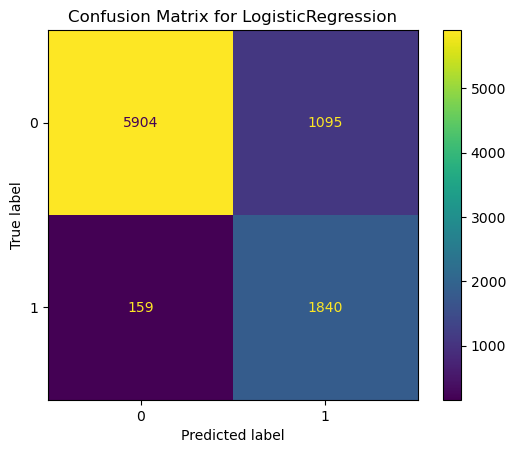

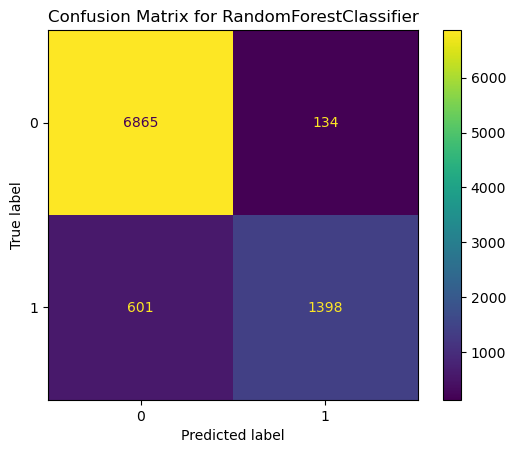

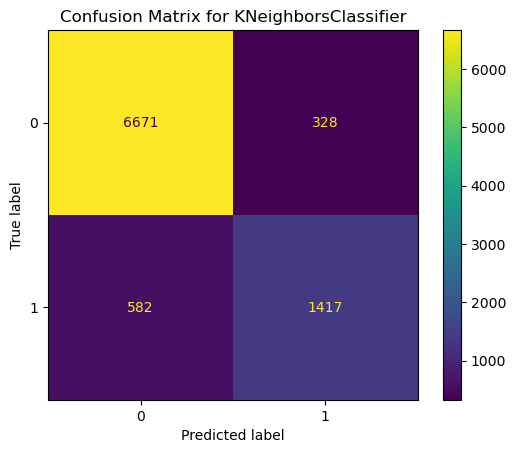

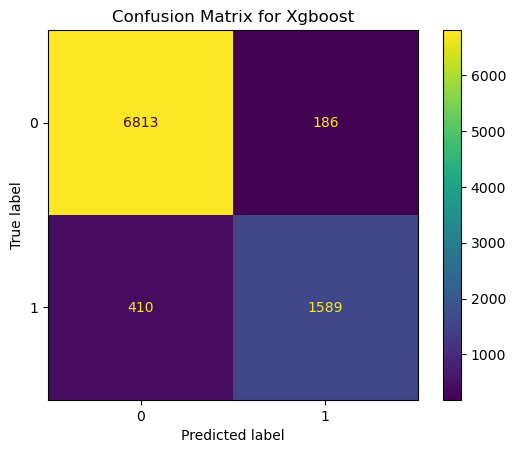

In [52]:
logreg = LogisticRegression(max_iter =2000, class_weight='balanced')
clf = RandomForestClassifier(max_depth = 8)
knn = KNeighborsClassifier()
xgb_clf = xgb.XGBClassifier()
model_accuracies, train_scores, test_scores, precision_scores, recall_scores, f1_scores = [], [], [], [], [], []
models = [logreg, clf,  knn, xgb_clf]
model_names = ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'Xgboost']

for model, model_name in zip(models, model_names):
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  model_accuracies.append(accuracy_score(y_test, y_pred))
  train_scores.append(model.score(X_train_scaled, y_train))
  test_scores.append(model.score(X_test_scaled, y_test))
  recall_scores.append(recall_score(y_test, y_pred))
  precision_scores.append(precision_score(y_test, y_pred))
  f1_scores.append(f1_score(y_test, y_pred))
  ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
  plt.title(f'Confusion Matrix for {model_name}');
  # print(f'Train Score for {models}: {model.score(X_train, y_train)}')
  # print(f'Test Score ')

In [53]:
model_scores_df = pd.DataFrame({'Model': model_names, 'Accuracy': model_accuracies, 'Train Scores': train_scores, 'Test Scores': test_scores, \
                                'Recall Score': recall_scores, 'Precision Score': precision_scores, 'F1 Scores': f1_scores}).set_index('Model').sort_values('Accuracy', ascending=False)
# [(i, j) for (i,j) in zip(model_names, model_accuracies)]
model_scores_df

,Accuracy,Train Scores,Test Scores,Recall Score,Precision Score,F1 Scores
Model,,,,,,
Xgboost,0.933763,0.968632,0.933763,0.794897,0.895211,0.842077
RandomForestClassifier,0.918315,0.925483,0.918315,0.699350,0.912533,0.791844
KNeighborsClassifier,0.898866,0.928012,0.898866,0.708854,0.812034,0.756944
LogisticRegression,0.860636,0.856329,0.860636,0.920460,0.626917,0.745845


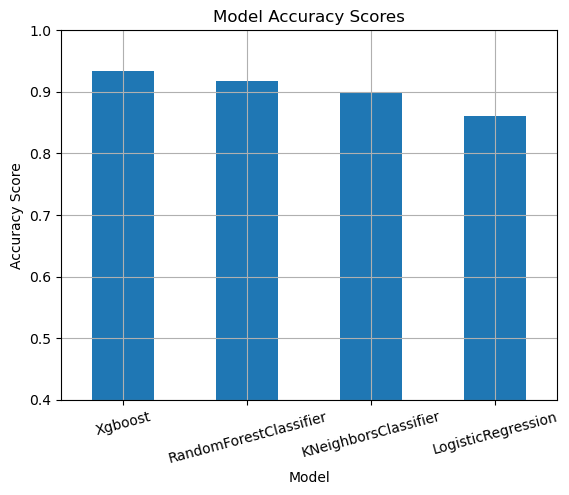

In [54]:
model_scores_df['Accuracy'].plot(kind='bar')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=15)
plt.ylim((.4, 1))
plt.title('Model Accuracy Scores')
plt.grid();

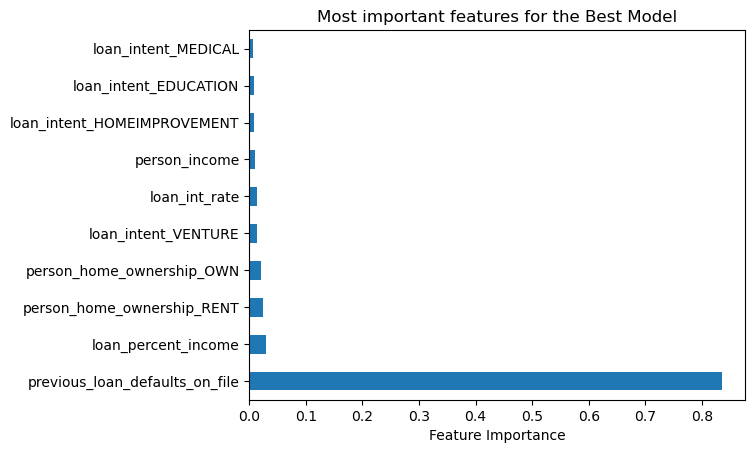

In [55]:
best_model = xgb_clf
best_model.feature_importances_
best_model_feat_imp = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
best_model_feat_imp[:10].plot(kind='barh')
plt.title('Most important features for the Best Model')
plt.xlabel('Feature Importance');
# plt.ylabel('Features');

In [ ]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'gamma': [0, 1, 5],
#     'reg_lambda': [1, 5, 10],      # L2 regularization
#     'reg_alpha': [0, 1, 5]
# }

# grid = RandomizedSearchCV(best_model, params=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': randint(0, 5),
    'reg_lambda': uniform(0, 5),
    'reg_alpha': uniform(0, 5),
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

search = RandomizedSearchCV(best_model, param_distributions=param_dist, n_iter=50, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42
)

TypeError: VotingClassifier.__init__() missing 1 required positional argument: 'estimators'

In [ ]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cddf8db9210>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cddf8e64a90>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cddf8e66610>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cddf8de81d0>},
                   random_state=42, scoring='f1', verbose=1)

In [ ]:
search.best_score_

np.float64(0.8445720937750416)

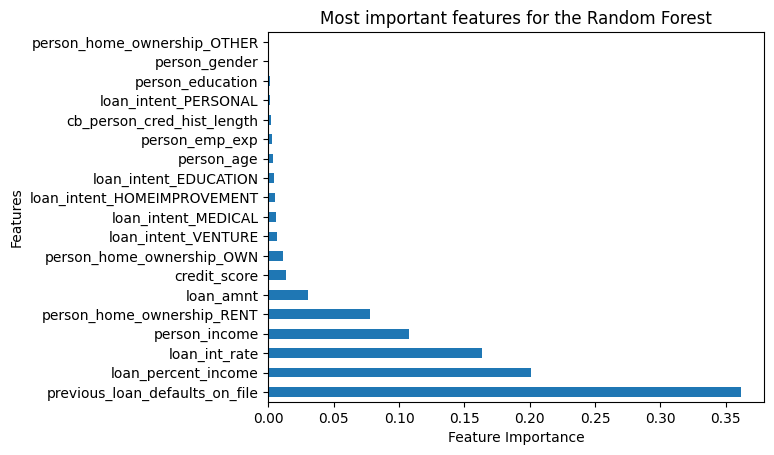

In [ ]:
clf_feat = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
clf_feat.plot(kind='barh')
plt.title('Most important features for the Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features');

In [ ]:
# cross validation for the best model
cv = cross_val_score(best_model, X_train_scaled, y_train, cv=10, n_jobs=-1)
print(f'Cross Validation Score: {cv}')
print(f'Mean Cross Validation Score: {cv.mean()}')

Cross Validation Score: [0.935      0.92722222 0.93637121 0.93692692 0.93637121 0.93692692
 0.92664629 0.92942484 0.93164768 0.93387052]
Mean Cross Validation Score: 0.9330407829335309


In [ ]:
uninfluential_features = ['person_home_ownership_OTHER', 'person_education', 'person_gender', 'cb_person_cred_hist_length',\
                          'loan_intent_HOMEIMPROVEMENT']

In [57]:
X_new = loan_dummies.drop(['age_categories', 'loan_status']+uninfluential_features, axis=1)
y_new = loan_dummies['loan_status']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=.2, stratify=y_new, random_state=42)

NameError: name 'uninfluential_features' is not defined

In [ ]:
from imblearn.over_sampling import RandomOverSampler
under_sampler = RandomOverSampler()
X_train_undersampled, y_train_undersampled = under_sampler.fit_resample(X_train, y_train)
logreg_undersampled = LogisticRegression(max_iter=2000)
logreg_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = logreg_undersampled.predict(X_test)
print(f'{classification_report(y_test, y_pred_undersampled)}')

In [ ]:
clf_undersampled = RandomForestClassifier(max_depth=8)
clf_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = clf_undersampled.predict(X_test_undersampled)

In [ ]:
print(f'Random Forest Training Score: {clf_undersampled.score(X_train_undersampled, y_train_undersampled)}')
print(f'Random Forest Test Score: {clf_undersampled.score(X_test_undersampled, y_test_undersampled)}')
print(f'Random Forest new Accuracy Score: {accuracy_score(y_test_undersampled, y_pred_undersampled)}')
print(classification_report(y_test_undersampled, y_pred_undersampled))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
over_sampler = RandomOverSampler()
over_sampler.fit_resample(X_train)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTEC
pipeline = Pipeline([('SMOTE', SMOTEC()),
                    ('Classifier', RandomForestClassifier(max_depth=8, class_weight='balanced'))
                     ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

In [1]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
cat_cols = ['person_gender', 'person_education', 'person_emp_exp', 'previous_loan_defaults_on_file']
pipeline = Pipeline([('SMOTENC', SMOTENC(categorical_features=cat_cols)),
                    ('Classifier', RandomForestClassifier(max_depth=8, class_weight='balanced'))
                     ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
import xgboost as xgb
cat_cols = ['person_gender', 'person_education', 'person_emp_exp', 'previous_loan_defaults_on_file']
pipeline = Pipeline([('SMOTENC', SMOTENC(categorical_features=cat_cols)),
                    ('Classifier', xgb.XGBClassifier())
                     ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
print(f'Train Score: {pipeline.score(X_train, y_train)}')
print(f'Train Score: {pipeline.score(X_test, y_test)}')

In [ ]:
cv = cross_val_score(pipeline, X, y, cv=10, n_jobs=-1)
print(f'Cross val scores: {cv}')
print(f'Mean Cross Val Score: {np.mean(cv)}')

In [19]:
import pickle
pickle.dump()

TypeError: dump() missing required argument 'obj' (pos 1)